# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [2]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.


In [3]:
def download_file(url, file_path):
    import requests
    r = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(r.content)

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

dataset = 'shakespeare.txt' # Other options are mark_twain.txt, charles_dickens.txt

download_file(f'https://github.com/UofT-DSI/deep_learning/raw/main/assignments/downloaded_books/' + dataset, dataset)

# Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(dataset, fraction=0.1)

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [5]:
# Your code here

# Print the first 1000 characters
print("First 1000 characters of the dataset:")
print(text[:1000])


First 1000 characters of the dataset:







<!DOCTYPE html>
<html
  lang="en"
  
  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"
  data-a11y-animated-images="system" data-a11y-link-underlines="true"
  
  >



  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">

      <link rel="preload" href="https://github.githubassets.com/assets/global-banner-disable-f988792be49f.js" as="script" crossorigin>

  <link rel="preload" href="https://github.githubassets.com/assets/mona-sans-d1bf285e9b9b.woff2" as="font" type="font/woff2" crossorigin>


  <link cross

In [6]:
# Report the dataset's size
dataset_size = len(text)
print(f"Dataset size: {dataset_size} characters")


Dataset size: 27103 characters


In [7]:
# Count unique characters
unique_characters = set(text)
num_unique_characters = len(unique_characters)
print(f"Number of unique characters: {num_unique_characters}")


Number of unique characters: 88


## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer


# Your code here
VOCAB_SIZE = 5000
OOV_TOKEN = "<OOV>"

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Fit the tokenizer on the text
tokenizer.fit_on_texts([text])

# Convert the text to a sequence of numbers
sequences = tokenizer.texts_to_sequences([text])[0]

In [10]:
# Print summary statistics
print(f"Vocabulary Size (excluding OOV token): {min(VOCAB_SIZE, len(tokenizer.word_index))}")
print(f"Number of tokens in the sequence: {len(sequences)}")
print(f"First 20 tokens: {sequences[:20]}")

Vocabulary Size (excluding OOV token): 761
Number of tokens in the sequence: 3720
First 20 tokens: [343, 108, 108, 344, 229, 15, 39, 230, 89, 15, 54, 55, 54, 15, 51, 55, 51, 15, 231, 345]


If everything worked, the following line should show you the first 10 words in the vocabulary:

In [11]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


[('<OOV>', 1), ('github', 2), ('script', 3), ('com', 4), ('https', 5), ('js', 6), ('defer', 7), ('assets', 8), ('githubassets', 9), ('crossorigin', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [12]:
import numpy as np

SEQ_LENGTH = 500 # Choose an appropriate sequence length

# Convert the text to a list of sequences of numbers
sequences = tokenizer.texts_to_sequences([text])[0]

# Generate the training sequences
X = []
y = []
# Your code here

for i in range(len(sequences) - SEQ_LENGTH):
    X.append(sequences[i:i+SEQ_LENGTH])
    y.append(sequences[i+SEQ_LENGTH])

X = np.array(X)
y = np.array(y)

Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [13]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [343 108 108 344 229  15  39 230  89  15  54  55  54  15  51  55  51  15
 231 345 232 346  15 231  22 347  47 233  14 348 349 234  22  28 137 138
  25   5   2   9   4  22  28 137 138  25   5 235 178   4  22  28 137 138
  25   5   2 350 351 352   4  22  28 137 138  25   5 139 232 178   4  22
  28 236  25   5   2   9   4  10  22  28 236  25   5 235 178   4  22  28
 237  25   5   2   9   4   8 140 179 353 354   6 238   3  10  22  28 237
  25   5   2   9   4   8 355 356 357 239 238 240  13 240 239  10  22  10
  11  41  42  28  43  25   5   2   9   4   8  54 358  40  22  10  11  41
  42  28  43  25   5   2   9   4   8  51 359  40  22  15  39  55  51 241
  10  11  41  42  28  43  15  25   5   2   9   4   8  51 241 360  40  22
  15  39  55  51 141 142  10  11  41  42  28  43  15  25   5   2   9   4
   8  51 141 142 361  40  22  15  39  55  51 143  10  11  41  42  28  43
  15  25   5   2   9   4   8  51 143 362  40  22  15  39  55  54 143  10
  11  41  42  28  43  15  25   5   2   9 

And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [15]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    y = to_categorical(y, num_classes=VOCAB_SIZE)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (2576, 500)
y_train shape: (2576, 5000)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=VOCAB_SIZE, output_dim=100, input_length=SEQ_LENGTH),
    
    # LSTM layer
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    
    # Another LSTM layer
    LSTM(units=128),
    Dropout(0.2),
    
    # Dense layer with softmax activation
    Dense(VOCAB_SIZE, activation='softmax')
])

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

c:\Users\cheta\anaconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

Categorical Crossentropy:  
We're using 'categorical_crossentropy' as our loss function because this is a multi-class classification problem. Each prediction is a probability distribution over the entire vocabulary, and we want to maximize the probability of the correct word.  

Adam:  
Adam is chosen as the optimizer because it's generally very effective for a wide range of deep learning tasks. It combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.  

Learning Rate:  
A learning rate of 0.001 is a common starting point that often works well. It's not too large to cause overshooting, nor too small to result in slow convergence.  



In [17]:
# Your code here

from keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [18]:
# Your code here

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 957ms/step - accuracy: 0.0341 - loss: 8.3620 - val_accuracy: 0.0217 - val_loss: 6.5823
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 809ms/step - accuracy: 0.0225 - loss: 5.9932 - val_accuracy: 0.0357 - val_loss: 5.9427
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0372 - loss: 5.4925 - val_accuracy: 0.0357 - val_loss: 5.9892
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 855ms/step - accuracy: 0.0345 - loss: 5.4694 - val_accuracy: 0.0357 - val_loss: 6.0235
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 864ms/step - accuracy: 0.0294 - loss: 5.4729 - val_accuracy: 0.0357 - val_loss: 6.0590


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

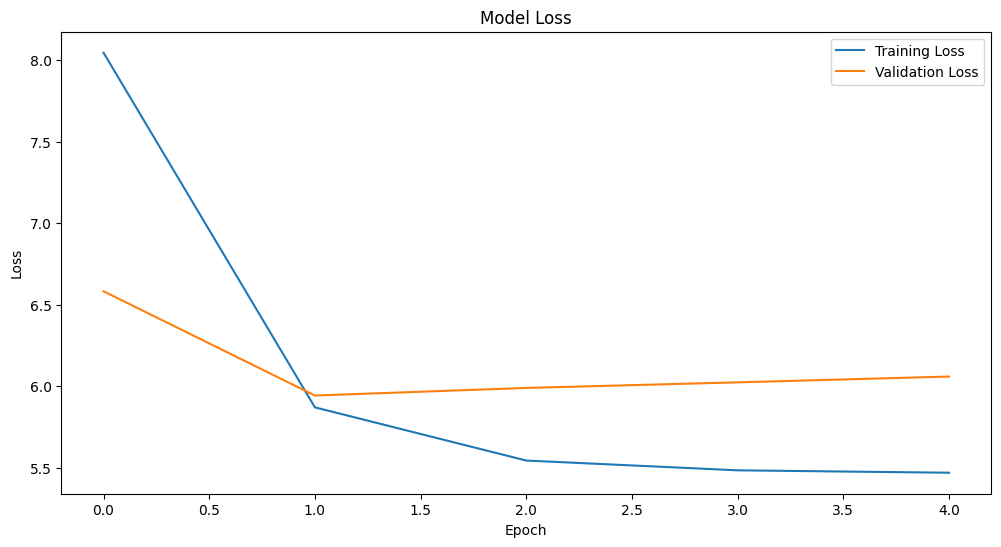

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [20]:
from keras.preprocessing.sequence import pad_sequences

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat

# def generate_text(model, tokenizer, seed_text, max_sequence_len):
#     """
#     Generate new text using the trained model.
#     You can use the `get_predicted_word` helper function to help you with this.
#     """
    
#     return None

def generate_text(model, tokenizer, seed_text, max_sequence_len, num_words=100):
    """
    Generate new text using the trained model.
    """
    generated_text = seed_text
    for _ in range(num_words):
        # Tokenize the current text
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        
        # Pad the sequence
        padded_sequence = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        
        # Predict the next word
        predicted = get_predicted_word(model, padded_sequence)
        
        # Get the word from the predicted index
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        # Add the predicted word to the generated text
        generated_text += " " + output_word
        
        # Print the word as it's generated (for "gpt-style" output)
        print(output_word, end=' ', flush=True)
    
    return generated_text


In [21]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

5 script 709 279 node assets ui transient build src queryclient focus https bb80ec defer js more index src rel  type cache detection script element type d png 22f5283 false label link is column min content items medium 1 button 776 178 track label defer node auto up type aria turbo com modern modules headermenu script class crossorigin script 6 esm github script content script type mobile partial js data crossorigin js raw property script https valid rel content modules dropdown github js bg  event error stylesheet flex og data js 1 633 target script ce7225a304c5 width github 

'hamlet 5 script 709 279 node assets ui transient build src queryclient focus https bb80ec defer js more index src rel  type cache detection script element type d png 22f5283 false label link is column min content items medium 1 button 776 178 track label defer node auto up type aria turbo com modern modules headermenu script class crossorigin script 6 esm github script content script type mobile partial js data crossorigin js raw property script https valid rel content modules dropdown github js bg  event error stylesheet flex og data js 1 633 target script ce7225a304c5 width github'

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [23]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

--2024-12-01 23:29:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

     0K .......... .......... .......... .......... ..........  0%  635K 22m6s
    50K .......... .......... .......... .......... ..........  0%  642K 21m59s
   100K .......... .......... .......... .......... ..........  0% 1.81M 17m11s
   150K .......... .......... .......... .......... ..........  0% 2.29M 14m23s
   200K .......... .......... .......... .......... ..........  0%  648K 15m50s
   250K .......... .......... .......... .......... ..........  0% 6.01M 13m35s
   300K .......... .......... .......... .......... ..........  0% 3.70M 12m10s
   350K .......... .......... .......... .......... .......... 

In [25]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [26]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((VOCAB_SIZE, 100))
    for word, i in tokenizer.word_index.items():
        if i < VOCAB_SIZE:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [27]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

c:\Users\cheta\anaconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
# Define a new model and train it
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the improved model architecture
improved_model = Sequential([
    Input(shape=(SEQ_LENGTH,)),  # Specify the input shape here
    embedding_layer,
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(256)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(VOCAB_SIZE, activation='softmax')
])



This architecture combines embedding layers with multiple bidirectional LSTM layers to capture sequential dependencies in text data effectively. The use of dropout layers helps mitigate overfitting, while the final dense layer provides predictions for text generation tasks. Overall, this model is designed to learn rich representations of text and generate coherent sequences based on learned patterns from training data.

In [34]:
# Compile the model
improved_model.compile(optimizer=Adam(learning_rate=0.001), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

# Print model summary
improved_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 500, 512)       │       731,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 500, 512)       │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 500, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5000)           │     2,565,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,208,616 (27.50 MB)

 Trainable params: 6,708,616 (25.59 MB)

 Non-trainable params: 500,000 (1.91 MB)

In [35]:
# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with callbacks
history = improved_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[reduce_lr, early_stopping]
)

# Print model summary
improved_model.summary()

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 346s 8s/step - accuracy: 0.0192 - loss: 7.2807 - val_accuracy: 0.0357 - val_loss: 5.9948 - learning_rate: 0.0010
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 426s 10s/step - accuracy: 0.0367 - loss: 5.6260 - val_accuracy: 0.0233 - val_loss: 5.7785 - learning_rate: 0.0010
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 484s 12s/step - accuracy: 0.0462 - loss: 5.2972 - val_accuracy: 0.0699 - val_loss: 5.4896 - learning_rate: 0.0010
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 522s 13s/step - accuracy: 0.0650 - loss: 5.0051 - val_accuracy: 0.0963 - val_loss: 5.3037 - learning_rate: 0.0010
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 488s 12s/step - accuracy: 0.1018 - loss: 4.7034 - val_accuracy: 0.1025 - val_loss: 5.1295 - learning_rate: 0.0010
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 421s 10s/step - accuracy: 0.1451 - loss: 4.4312 - val_accuracy: 0.1848 - val_loss: 5.0118 - learning_rate: 0.0010
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 427s 10s/step - accuracy: 0.2068 - loss: 4.1366 - v

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 500, 512)       │       731,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 500, 512)       │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 500, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5000)           │     2,565,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,625,850 (78.68 MB)

 Trainable params: 6,708,616 (25.59 MB)

 Non-trainable params: 500,000 (1.91 MB)

 Optimizer params: 13,417,234 (51.18 MB)

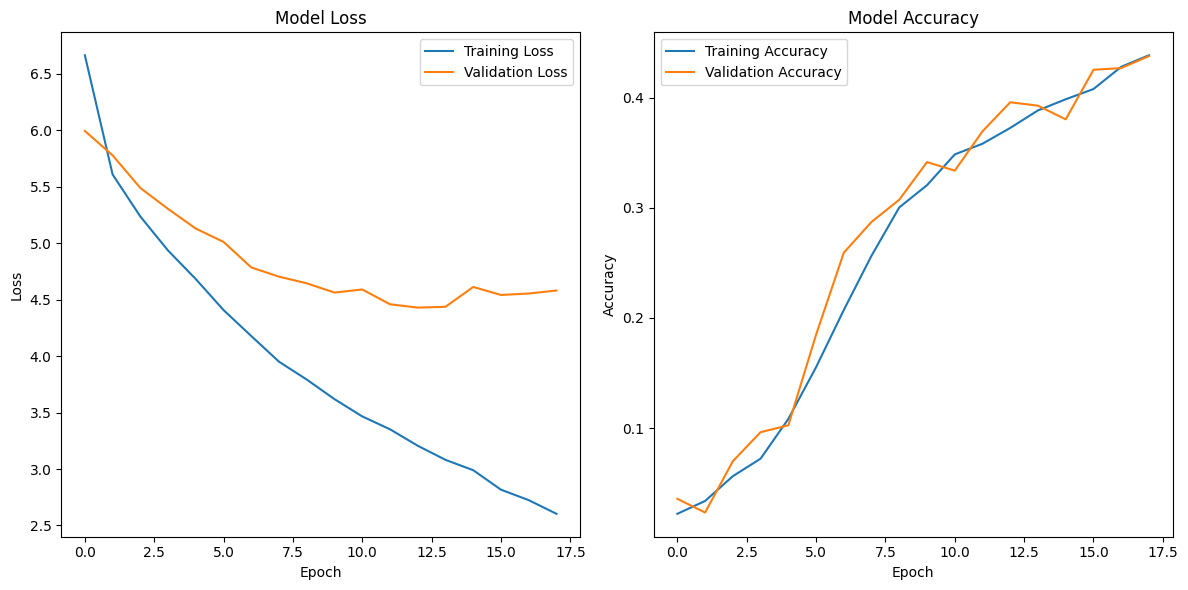

In [40]:
# Plot the training history for loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training history for accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

By implementing these strategies—reducing model complexity, adjusting batch size and learning rates, using callbacks for early stopping and learning rate scheduling—you have potentially reduce training time while improving the accuracy of your model. Loss is also reduced with increase of training for noth train and validation dataset.  

In [39]:
# Generate text using the improved model
seed_text = "To be or not to be"
generated_text = generate_text(improved_model, tokenizer, seed_text, SEQ_LENGTH, num_words=15)
print("\nGenerated text:", generated_text)

2fassignments data rel padding deep google github partial src 7b7b5264f6c1 behaviors browser light errors where 
Generated text: To be or not to be 2fassignments data rel padding deep google github partial src 7b7b5264f6c1 behaviors browser light errors where


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.